In [ ]:
# Importing libraries for data handling, visualization, preprocessing, modeling, 
# evaluation metrics, clustering, dimensionality reduction, and model serialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [ ]:
# Load the employee salary dataset and display its first rows and structure
df = pd.read_csv("employee_salary_dataset.csv")
print(df.head())
print(df.info())

   Age Education Level                  Job Title  Experience (Years)  \
0   32      Bachelor's  Machine Learning Engineer                   3   
1   36        Master's         Research Scientist                  13   
2   28      Bachelor's          Financial Analyst                   7   
3   47      Bachelor's                 Technician                   9   
4   57        Master's                 Accountant                  12   

        Industry  Hours/Week Work Mode                     Skills  \
0  Manufacturing          49    Onsite  Deep Learning, Python, ML   
1      Utilities          49    Remote   R, Python, Data Analysis   
2     Healthcare          36    Remote          Valuation, Python   
3  Manufacturing          43    Onsite   Safety, CNC, Maintenance   
4             IT          41    Onsite          Tally, Compliance   

   Salary (USD)  
0         96189  
1        110513  
2         80428  
3         52344  
4         72856  
<class 'pandas.core.frame.DataFrame'>


In [3]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna(method="ffill", inplace=True)

C:\Users\lavan\AppData\Local\Temp\ipykernel_1936\1061655060.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [ ]:
# Split the dataset into features (X) and target variable (y: Salary in USD)
X = df.drop("Salary (USD)", axis=1)
y = df["Salary (USD)"]

In [ ]:
ategorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(include=["int64"]).columns
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [9]:
print(y.value_counts())


Salary (USD)
96189     1
121273    1
83022     1
61816     1
55340     1
         ..
63661     1
44838     1
79583     1
110379    1
62146     1
Name: count, Length: 200, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    
    print(f"\n{name}")
    print("R2 Score:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))


Linear Regression
R2 Score: 0.7460058096562856
MAE: 9967.410302785314
RMSE: 12523.194312271655

Random Forest
R2 Score: 0.7197233155528057
MAE: 9710.5405
RMSE: 13155.177532585603


In [42]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20]
}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)
import joblib

joblib.dump(grid.best_estimator_, "salary_model.pkl")

print("Best Params:", grid.best_params_)

Best Params: {'model__max_depth': None, 'model__n_estimators': 200}


In [44]:
model = joblib.load("models/salary_model.pkl")
print(type(model))

<class 'sklearn.pipeline.Pipeline'>


In [16]:
best_model = grid.best_estimator_

rf = best_model.named_steps["model"]
importances = rf.feature_importances_
feature_names = best_model.named_steps["preprocess"].get_feature_names_out()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))

                                     Feature  Importance
1                    num__Experience (Years)    0.461820
26                 cat__Job Title_Technician    0.050701
10             cat__Job Title_Cloud Engineer    0.040876
49                 cat__Skills_Azure, Python    0.039814
2                            num__Hours/Week    0.037285
20            cat__Job Title_Product Manager    0.036146
18  cat__Job Title_Machine Learning Engineer    0.033993
14                cat__Job Title_Electrician    0.027568
0                                   num__Age    0.027165
23         cat__Job Title_Research Scientist    0.026968


In [17]:
#unsupervised learning 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_processed = preprocessor.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

df["Cluster"] = clusters

print("Silhouette Score:", silhouette_score(X_processed, clusters))

c:\Users\lavan\anaconda3\envs\tf\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lavan\anaconda3\envs\tf\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\lavan\anaconda3\envs\tf\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\lavan\anaconda3\envs\tf\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\lavan\anaconda3\envs\tf\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Silhouette Score: 0.11932901285795308


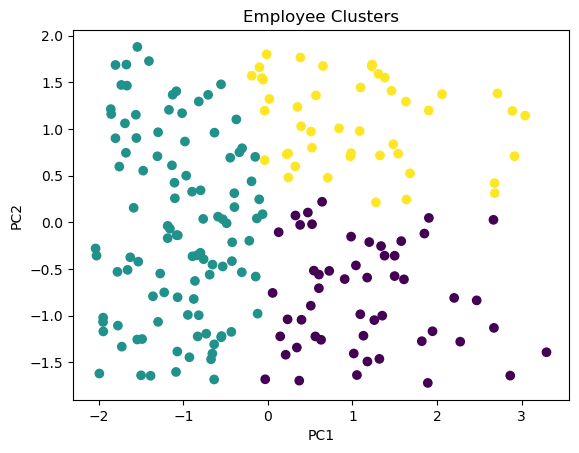

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_processed)

plt.figure()
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters)
plt.title("Employee Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [19]:
#extra work

In [20]:
df["Skills_List"] = df["Skills"].str.split(", ")

# Explode skills
skills_exploded = df.explode("Skills_List")

# Skill frequency
skill_counts = skills_exploded["Skills_List"].value_counts()

print(skill_counts.head(10))

Skills_List
Python           65
Excel            27
SEO              23
Communication    18
PM               18
Safety           17
ML               16
Analytics        16
InDesign         14
SEM              13
Name: count, dtype: int64


In [21]:
skill_freq = skill_counts.to_dict()

df["Skill_Score"] = df["Skills_List"].apply(
    lambda skills: sum(skill_freq[s] for s in skills)
)

In [22]:
skill_salary = skills_exploded.groupby("Skills_List")["Salary (USD)"].mean().sort_values(ascending=False)

print(skill_salary.head(10))

Skills_List
Azure            125533.625000
Networking       112218.000000
CI/CD            111623.125000
Docker           110952.142857
MS Project       106965.700000
AWS              103433.375000
Data Analysis    103330.083333
Deep Learning    103113.666667
R                103098.416667
JIRA             100791.500000
Name: Salary (USD), dtype: float64


In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring="r2")
    
    results.append({
        "Model": name,
        "Mean R2": r2_scores.mean(),
        "Std R2": r2_scores.std()
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model   Mean R2    Std R2
0  Linear Regression  0.737316  0.073552
1      Random Forest  0.615812  0.074825


In [ ]:


# After training my machine learning model, I wanted to understand:

# Which features influence predictions the most

# Whether the model is making logical decisions

# If there is any bias or data leakage

# How each feature contributes positively or negatively

# For this purpose, I used SHAP (SHapley Additive exPlanations).

# SHAP is based on cooperative game theory and explains each prediction by assigning a contribution value to every feature.
# I used SHAP to interpret my model. The summary plot revealed Feature 1 contributes most to prediction. High values positively influence output, while low values reduce it. This helped validate domain assumptions and ensured the model is not behaving randomly."

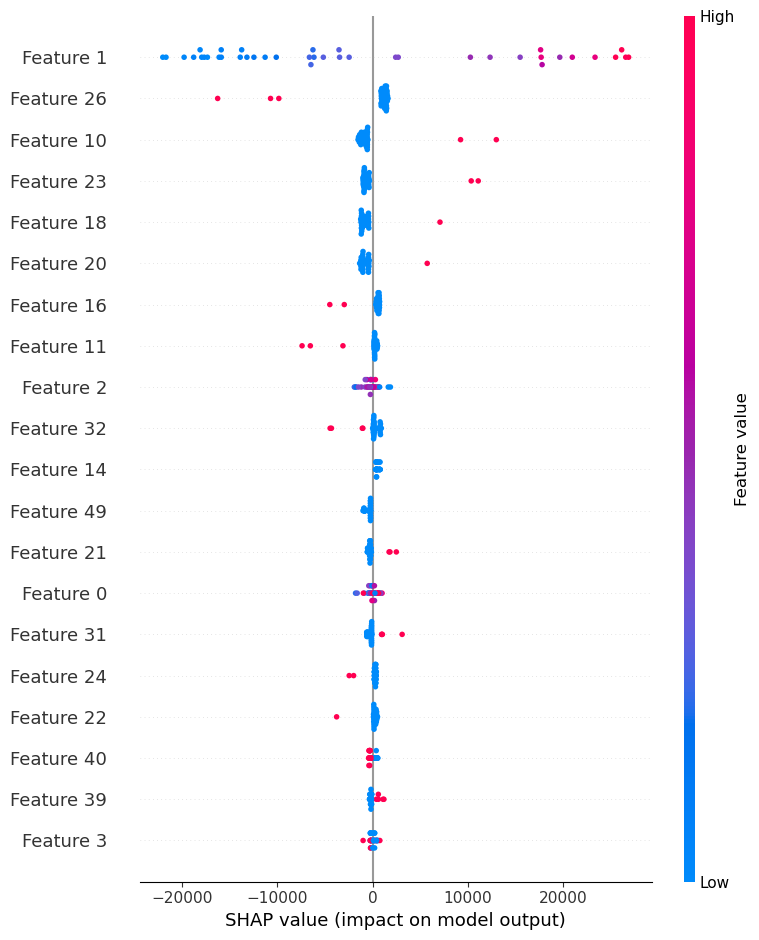

In [ ]:

import numpy as np
import shap

# 1️⃣ Transform using pipeline preprocessor
X_transformed = best_model.named_steps["preprocess"].transform(X_test)

# 2️⃣ If sparse matrix → convert to dense
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# 3️⃣ Force numeric float64
X_transformed = np.asarray(X_transformed, dtype=np.float64)

# 4️⃣ Create SHAP explainer
explainer = shap.TreeExplainer(best_model.named_steps["model"])

# 5️⃣ Compute SHAP values
shap_values = explainer.shap_values(X_transformed)

# 6️⃣ Plot
shap.summary_plot(shap_values, X_transformed)

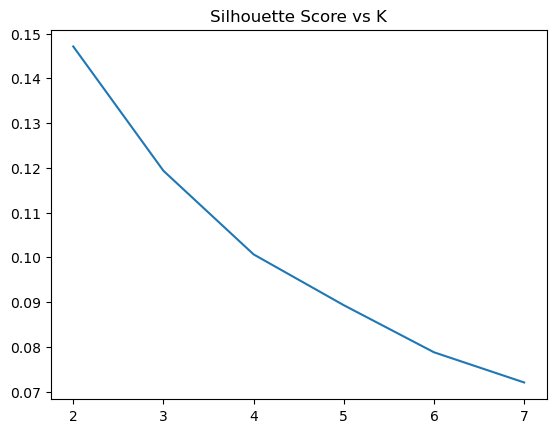

['kmeans_model.pkl']

In [35]:
# I determined optimal K using Silhouette Score, analyzed centroid characteristics, and transformed clusters into interpretable personas for strategic insight.
from sklearn.metrics import silhouette_score

scores = []

for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_processed)
    scores.append(silhouette_score(X_processed, labels))

plt.plot(range(2,8), scores)
plt.title("Silhouette Score vs K")
plt.show()
import joblib

joblib.dump(best_model, "kmeans_model.pkl")

In [32]:
df.groupby("Cluster").agg({
    "Salary (USD)": "mean",
    "Experience (Years)": "mean",
    "Age": "mean"
})

,Salary (USD),Experience (Years),Age
Cluster,,,
0,94901.288462,15.807692,51.423077
1,72417.388350,4.126214,31.825243
2,100188.044444,16.311111,49.000000


In [45]:
model = pickle.load(open("models/salary_model.pkl", "rb"))

In [48]:
print("Model type:", type(model))

Model type: <class 'numpy.ndarray'>


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

cluster_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("kmeans", KMeans(n_clusters=3, random_state=42))
])

cluster_pipeline.fit(X)

import joblib
joblib.dump(cluster_pipeline, "models/kmeans_model.pkl")

['models/kmeans_model.pkl']

In [50]:
import joblib
joblib.dump(kmeans, "models/kmeans_model.pkl")

['models/kmeans_model.pkl']